In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

from tensorflow.contrib.learn.python.learn.datasets import base

SOURCE_URL = 'https://storage.googleapis.com/cloud-deeplearning/kaggle_mnist_data/'
DOWNLOAD_DATASETS=True
KAGGLE_TRAIN_CSV = 'train.csv'
DATA_DIR = '../input/'

In [2]:
def load_images():
    if DOWNLOAD_DATASETS:
        base.maybe_download(KAGGLE_TRAIN_CSV, DATA_DIR, SOURCE_URL + KAGGLE_TRAIN_CSV)

    # Import data from datasource, see https://www.kaggle.com/kakauandme/tensorflow-deep-nn
    # read training data from CSV file 
    data = pd.read_csv(DATA_DIR + KAGGLE_TRAIN_CSV)
    
    images = data.iloc[:,1:].values
    images = images.astype(np.float)
    
    labels_flat = data.iloc[:,0].values
    
    return {'images': images, 'labels': labels_flat}

In [3]:
dataset = load_images()

In [4]:
import cv2
import numpy as np

img = dataset['images'][0].reshape([28,28])

res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

#OR

height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

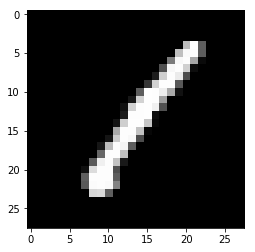

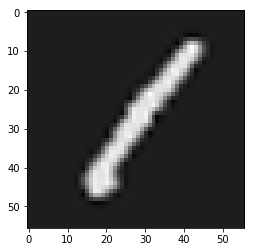

In [5]:
# plt.title('Example: %d  Label: %d' % (num, label))
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()
plt.imshow(res, cmap=plt.get_cmap('gray'))
plt.show()

In [6]:
import numpy as np
imgs = dataset['images']

In [7]:
images = np.reshape(imgs, (42000, 28, 28))
# images = np.expand_dims(images, axis=3)

In [8]:
images[0].shape

(28, 28)

In [9]:
from imgaug import augmenters as iaa
import random

random.seed(42)

always = lambda aug: iaa.Sometimes(1.0, aug)

# AFFINE (self, scale=1.0, translate_percent=None, translate_px=None,
#                  rotate=0.0, shear=0.0, order=1, cval=0, mode="constant",
#                  name=None, deterministic=False, random_state=None):

augmented_images = []
for index in range(len(images)):
    seq = iaa.Sequential([
        iaa.Affine(rotate=random.uniform(-15.0,15.0)),
        iaa.Affine(translate_px=[random.randint(-1,1), random.randint(-1,1)]),
        iaa.Affine(shear=random.uniform(-20.0,20.0))
    ])
    augmented_images.extend(seq.augment_images(images[index:index+1]))

42000


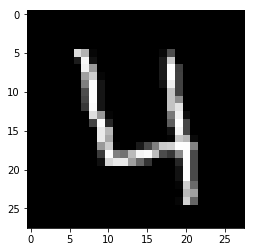

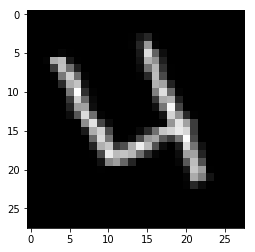

In [12]:
print(len(augmented_images))
index = 3
plt.imshow(images[index], cmap=plt.get_cmap('gray'))
plt.show()
plt.imshow(augmented_images[index], cmap=plt.get_cmap('gray'))
plt.show()


In [ ]:
images[0].reshape(784).reshape(28,28).reshape(784)